In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


In [23]:
energias=np.array([32.8,511,661.7,1173.2,1274.5,1332.5])
canales=np.array([93.28,1290.79,1661.56,2873.01,3132.70,3256.57])

In [24]:
def E(canal,a0,a1):
    return a1*canal+a0




In [25]:
fit1=curve_fit(E,canales,energias)
args=fit1[0]
errorargs=np.sqrt(np.diag(fit1[1]))

def canal(E):
    return (E-args[0])/args[1]

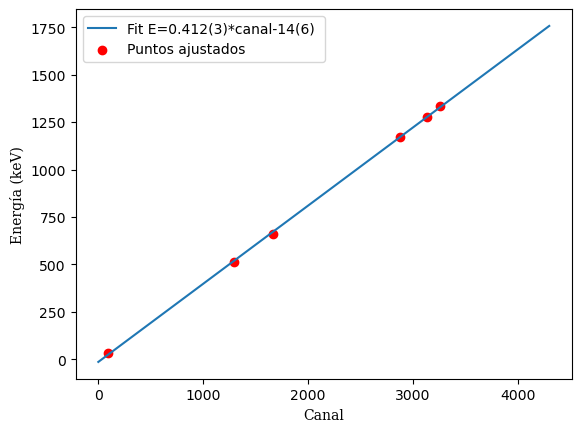

In [27]:
x=np.linspace(0,4300)
y=E(x,*args)
plt.plot(x,y,label=f"Fit E={args[1]:.3f}({errorargs[1]*10**3:.0f})*canal{args[0]:.0f}({errorargs[0]:.0f}) ")
plt.scatter(canales,energias,color="r",label="Puntos ajustados")
plt.xlabel("Canal",family="serif")
plt.ylabel("Energía (keV)",family="serif")
plt.legend()

In [30]:
for i in range(0,6):
    j=energias[i]
    a=canales[i]
    b=E(a,*args)
    c=j-b
    d=c/j
    d=abs(100*d)
    print(f"E={j} canal={a} E_ajuste={b:.4f} DeltaE={c:.4f} %={d:.9f}")


E=32.8 canal=93.28 E_ajuste=24.5959 DeltaE=8.2041 %=25.012581523
E=511.0 canal=1290.79 E_ajuste=517.7512 DeltaE=-6.7512 %=1.321183798
E=661.7 canal=1661.56 E_ajuste=670.4408 DeltaE=-8.7408 %=1.320955453
E=1173.2 canal=2873.01 E_ajuste=1169.3369 DeltaE=3.8631 %=0.329281297
E=1274.5 canal=3132.7 E_ajuste=1276.2817 DeltaE=-1.7817 %=0.139797203
E=1332.5 canal=3256.57 E_ajuste=1327.2935 DeltaE=5.2065 %=0.390729565
